# 결정 트리(DecisionTree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

## 모델 시각화

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

In [7]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

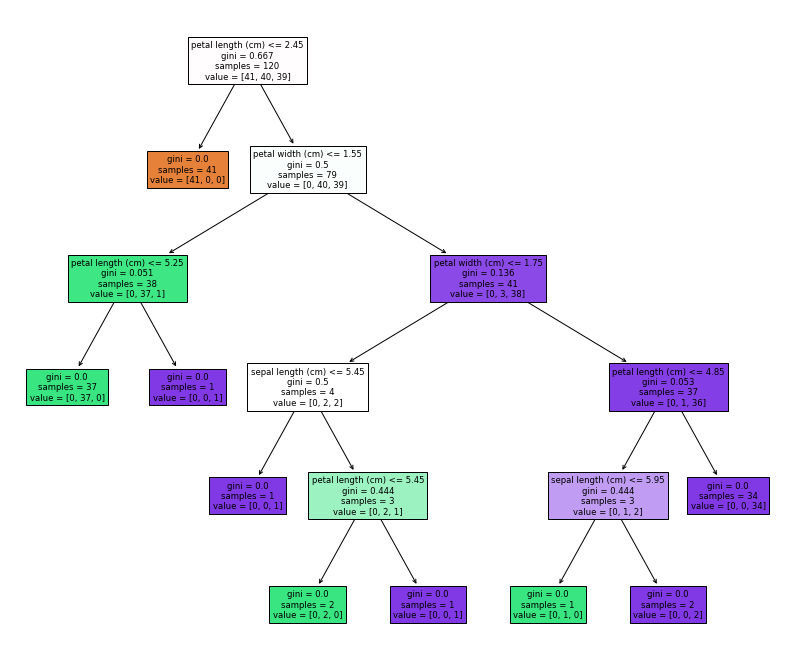

In [9]:
# graphviz 설치 안되는 사람
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
plot_tree(dt_clf, filled = True, feature_names= iris.feature_names)
plt.show()

In [10]:
pred = dt_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

## 제약 조건
- max_depth = 3 인 경우

In [12]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [13]:
export_graphviz(dt_clf2, out_file="tree2.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

NameError: name 'graphviz' is not defined

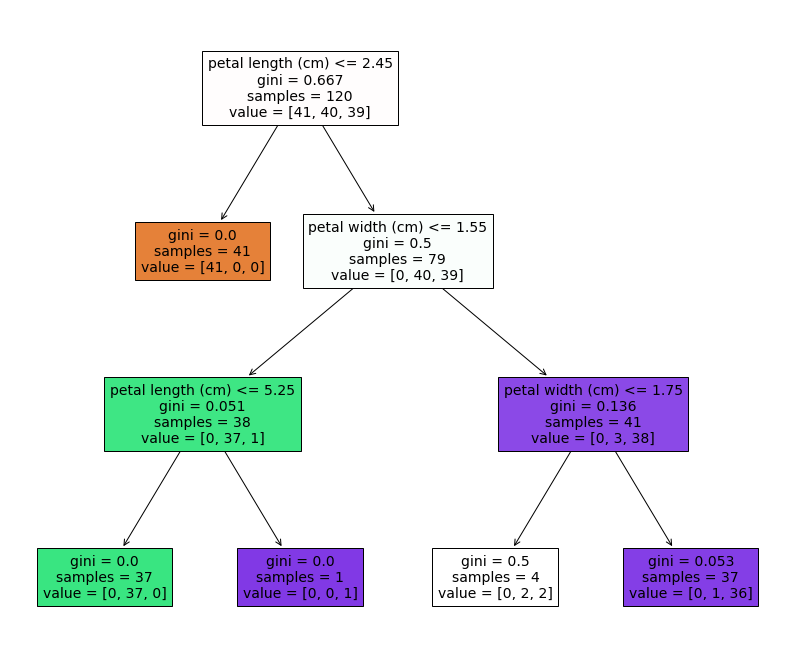

In [14]:
# graphviz 설치 안되는 사람
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
plot_tree(dt_clf2, filled = True, feature_names= iris.feature_names)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test, pred2)

0.9333333333333333

- min_samples_split = 4 인 경우

In [16]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

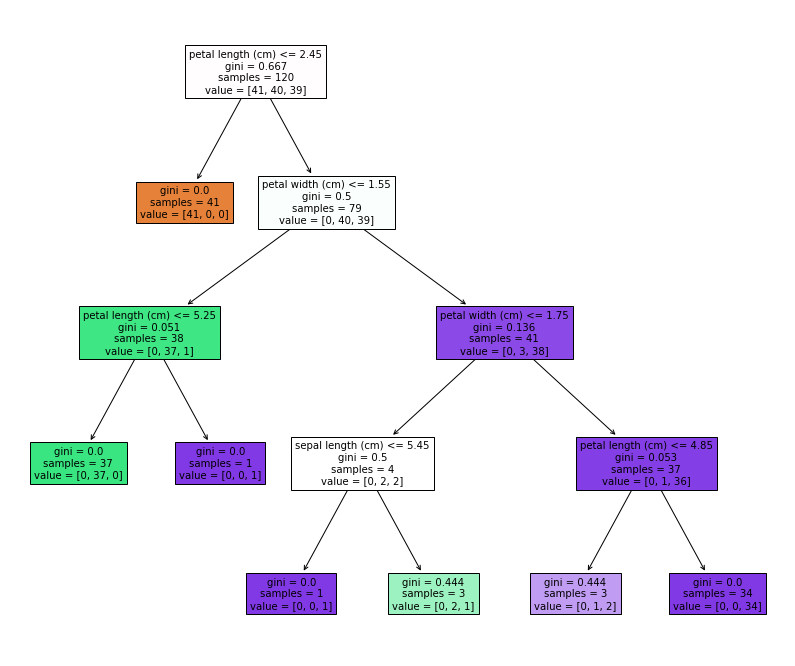

In [17]:
# graphviz 설치 안되는 사람
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
plot_tree(dt_clf3, filled = True, feature_names= iris.feature_names)
plt.show()

In [18]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

- min_samples_leaf = 4 인 경우

In [19]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

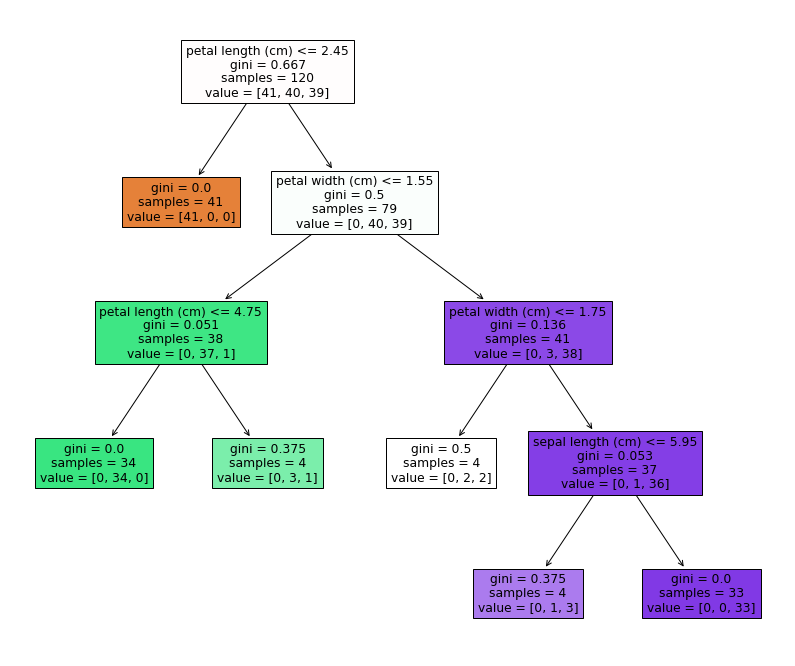

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
plot_tree(dt_clf4, filled = True, feature_names= iris.feature_names)
plt.show()

## Feature 중요도

In [21]:
import seaborn as sns
%matplotlib inline

In [23]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

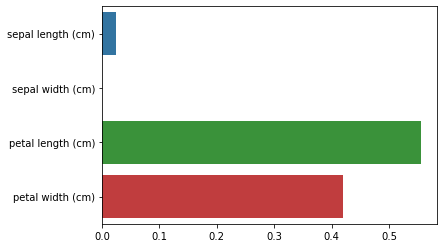

In [24]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
plt.show()